In [1]:
%%capture
import numpy as np
from matplotlib import pyplot as plt
import itertools
from sklearn.utils import shuffle
import tensorflow as tf
%run "./utils.ipynb"
%run "./Data preprocessing.ipynb"

In [2]:
X.shape

(17615, 100, 100)

In [3]:
X, y = shuffle(X, y, random_state=0)

In [4]:
X = np.stack((X,)*3, axis=-1)
print(X.shape)

(17615, 100, 100, 3)


In [5]:
X = tf.keras.applications.vgg16.preprocess_input(
    X, data_format=None
)

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam 

In [7]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42, stratify=y) 

In [8]:
model = Sequential()

conv_base = VGG16(input_shape=(100,100,3), include_top=False, pooling='max',weights='imagenet')
# conv_base.trainable = False
model.add(conv_base)
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
# model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) 

# train_layers = [layer for layer in conv_base.layers[::-1][:5]]

# for layer in conv_base.layers:
#   if layer in train_layers:
#     layer.trainable = True

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [9]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 5)                 2565      
Total params: 14,717,253
Trainable params: 14,717,253
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, callbacks=cbs,verbose=1) 

Train on 13211 samples, validate on 4404 samples
Epoch 1/20
13211/13211 [==============================] - 106s 8ms/sample - loss: 0.7509 - accuracy: 0.7475 - val_loss: 0.3257 - val_accuracy: 0.8585
Epoch 2/20
13211/13211 [==============================] - 102s 8ms/sample - loss: 0.3198 - accuracy: 0.8637 - val_loss: 0.2807 - val_accuracy: 0.8860
Epoch 3/20
13211/13211 [==============================] - 102s 8ms/sample - loss: 0.2488 - accuracy: 0.8952 - val_loss: 0.2614 - val_accuracy: 0.8896
Epoch 4/20
13211/13211 [==============================] - 102s 8ms/sample - loss: 0.1939 - accuracy: 0.9202 - val_loss: 0.2170 - val_accuracy: 0.9217
Epoch 5/20
13211/13211 [==============================] - 102s 8ms/sample - loss: 0.1536 - accuracy: 0.9401 - val_loss: 0.2074 - val_accuracy: 0.9223

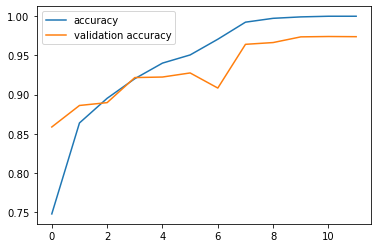

In [11]:
accuracy_graph(history)

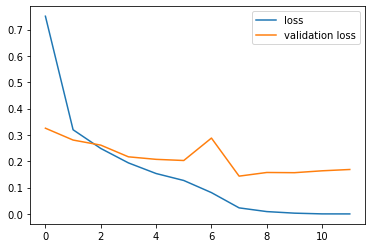

In [12]:
loss_graph(history)

In [13]:
predictions = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, predictions)

Confusion matrix, without normalization
[[883   2   0   4  15]
 [  0 829  46   0   0]
 [  0  38 836   0   1]
 [ 30   0   0 843   2]
 [ 19   0   0   1 855]]


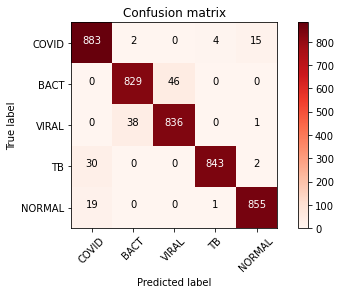

In [14]:
plot_confusion_matrix(cm, ["COVID" ,"BACT", "VIRAL", "TB", "NORMAL"])

In [15]:
print(classification_report(y_test, predictions));

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       904
           1       0.95      0.95      0.95       875
           2       0.95      0.96      0.95       875
           3       0.99      0.96      0.98       875
           4       0.98      0.98      0.98       875

    accuracy                           0.96      4404
   macro avg       0.96      0.96      0.96      4404
weighted avg       0.96      0.96      0.96      4404

